MNIST Dataset Description
The MNIST (Modified National Institute of Standards and Technology) dataset is a collection of handwritten digits commonly used in machine learning and computer vision tasks. It is a benchmark dataset for training models in handwritten digit recognition.

Dataset Details:
Total Samples: 70,000 images
Training Set: 60,000 images
Test Set: 10,000 images
Image Dimensions: 28x28 pixels (grayscale)
Labels:
The dataset contains labels from 0 to 9, representing the digits in the images.

<h1>Loading & preprocessing data</h1>

In [22]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [23]:
(x_train, y_train_raw), (x_test, y_test_raw) = mnist.load_data()

# Check the shape of raw labels
print(f"Raw y_train shape: {y_train_raw.shape}")
print(f"Raw y_test shape: {y_test_raw.shape}")

Raw y_train shape: (60000,)
Raw y_test shape: (10000,)


In [24]:

# Normalize the pixel values (scale between 0 and 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [25]:
# Reshape data for ANN
# For ANN: Flatten images to 1D vectors
x_train_ann = x_train.reshape(-1, 28 * 28)
x_test_ann = x_test.reshape(-1, 28 * 28)
x_train_ann 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [27]:
from tensorflow.keras.utils import to_categorical

# Correctly one-hot encode the labels
y_train = to_categorical(y_train_raw, num_classes=10)
y_test = to_categorical(y_test_raw, num_classes=10)

# Check the shape after one-hot encoding
print(f"Corrected y_train shape: {y_train.shape}")
print(f"Corrected y_test shape: {y_test.shape}")


Corrected y_train shape: (60000, 10)
Corrected y_test shape: (10000, 10)


<h1>Building the model</h1>

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(28 * 28,)),  # Input: 784 flattened pixels
    Dense(64, activation='relu'),                          # Hidden layer
    Dense(10, activation='softmax')                        # Output layer (10 classes)
])


In [44]:
# Compile the model (this step is required before training)
model.compile(optimizer='adam',                    # Optimizer
              loss='categorical_crossentropy',     # Loss function
              metrics=['accuracy']) 

In [45]:
# After compiling, you can now train the model
history = model.fit(x_train_ann, y_train, 
                    epochs=10, batch_size=32, 
                    validation_data=(x_test_ann, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8767 - loss: 0.4270 - val_accuracy: 0.9647 - val_loss: 0.1222
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9682 - loss: 0.1021 - val_accuracy: 0.9702 - val_loss: 0.0964
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9779 - loss: 0.0720 - val_accuracy: 0.9779 - val_loss: 0.0762
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9843 - loss: 0.0493 - val_accuracy: 0.9781 - val_loss: 0.0714
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9874 - loss: 0.0376 - val_accuracy: 0.9780 - val_loss: 0.0743
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9892 - loss: 0.0322 - val_accuracy: 0.9773 - val_loss: 0.0790
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9921 - loss: 0.0243 - val_accuracy: 0.9772 - val_loss: 0.0827
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9926 - loss: 0.0200 - 

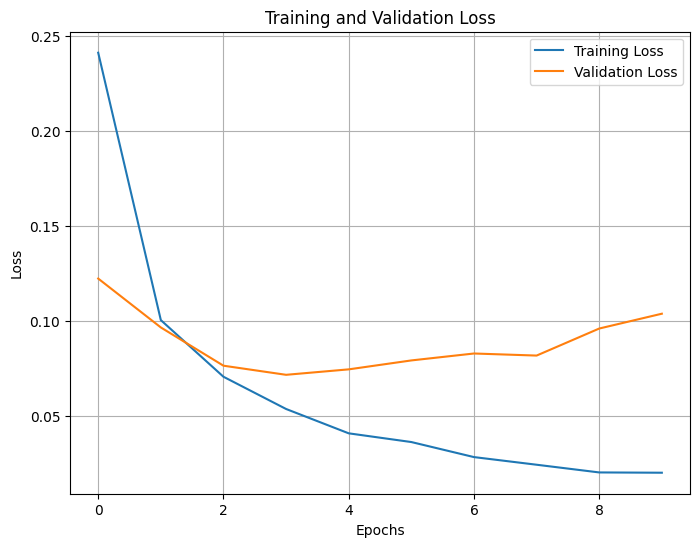

In [46]:

import matplotlib.pyplot as plt

# Extract loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()



In [47]:
import numpy as np

# Select an image from the test set
test_image = x_test[0]  # First image in the test set
test_label = np.argmax(y_test[0])  # True label of the first image

# Preprocess the image for ANN (flatten and add batch dimension)
test_image_flattened = test_image.reshape(1, 28 * 28)  # Shape (1, 784)

# Make a prediction
predictions = model.predict(test_image_flattened)
predicted_class = np.argmax(predictions[0])  # Get the index of the highest probability

# Output the results
print(f"True Label: {test_label}")
print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
True Label: 7
Predicted Class: 7


In [48]:
# Save the model in HDF5 format
model.save("mnist_ann_model.h5")
print("Model saved as 'mnist_ann_model.h5'")


Model saved as 'mnist_ann_model.h5'


In [49]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("mnist_ann_model.h5")
print("Model loaded successfully.")

Model loaded successfully.
